Cost is : 19608941954.06892
Cost is : 1823565936.4879372
Cost is : 1684378113.7331765
Cost is : 1577262788.826465
Cost is : 1494558906.4439476
Cost is : 1430463561.8589582
Cost is : 1380565961.9333205
Cost is : 1341512390.2429926
Cost is : 1310751925.2927365
Cost is : 1286343432.7585678


ValueError: x and y must have same first dimension, but have shapes (10000,) and (1000,)

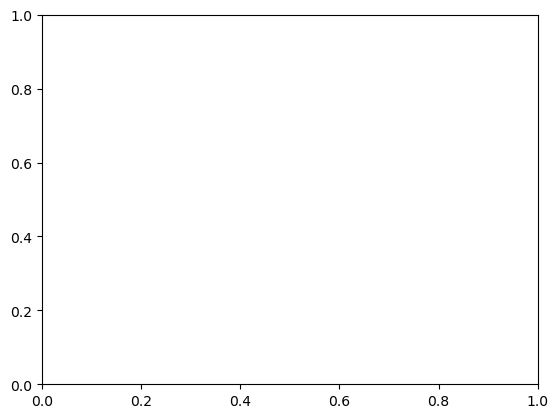

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_data = train.values     #converts df to nparray
Y = train_data[:, -1].reshape(train_data.shape[0], 1)   #reshape is used to make Y a column vector
X = train_data[:, :-1]
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]
X = np.vstack((np.ones((X.shape[0], )), X.T)).T      #to make sure w1*x1,w2*x2 and so on by adding a column of 1's
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

def regression(X,Y,alpha,iterations):
    m = Y.size
    W = np.zeros((X.shape[1],1))
    B = 0
    cost_list = []

    for i in range(iterations):
        y_prediction= np.dot(X,W) + B
        cost = (1/(2*m))*np.sum(np.square(y_prediction - Y))
        W_slope = (1/m)*np.dot(X.T, y_prediction - Y)
        B_slope = (1/m)*(y_prediction - Y)
        W = W - alpha*W_slope
        B = B - alpha*B_slope

        cost_list.append(cost)
        if (i %(iterations/ 10) == 0):
            print("Cost is :", cost)

    return W,cost_list

iteration = 10000
alpha = 0.000000005
W, cost_list = regression(X, Y, alpha =0.000000005,iterations=1000)

rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

data_train_df = pd.read_csv('train.csv')
X = data_train_df.drop(columns=['SalePrice'])

Y = data_train_df['SalePrice']

data_test_df = pd.read_csv('test.csv')

def rescaling(data):
    mean = data.mean()
    std = data.std()
    data = (data - mean)/std * 10
    return data

def scaling(data, mean, std):
    data = data*std/10 + mean
    return data

def linear_regression(w, b, data, LRate,final):
    m = len(data)

    w_gradient = 0
    b_gradient = 0
    y_found = list()
    costfn = 0

    for index, row in data.iterrows():
        y_hat = np.dot(w, row) + b
        y_actual = rescaling(data_train_df['SalePrice'])[index]
        error = round(y_hat - y_actual,5)
        costfn += round((error**2)/(2*m),8)

        w_gradient += round(error*row/m, 5)
        b_gradient += round(error/m, 5)
        if final == True:
            y_found.append(y_hat*Y.std()/10 + Y.mean())

    w = round(w - LRate*w_gradient,8)
    b = round(b - LRate*b_gradient,8)
    return w, b, costfn, y_found

def CheckAccuracy(w, b, data):
    x = data.drop(columns=['SalePrice'])
    x = (x - X.mean())/X.std() * 10
    y = data['SalePrice']
    y = (y - Y.mean())/Y.std() * 10
    score = 0
    for index, row in x.iterrows():
        y_hat = np.dot(w, row) + b
        if y_hat == y[index]:
            score += 1
    score = score*100/len(data)
    return score


X = rescaling(X)

w = np.zeros(X.shape[1])
b = 0
costfn = list()
for i in range(500):
    if i%50 == 0:
        print(i)
    if i==499:
        f = True
    else:
        f = False
    w,b,c,y_found = linear_regression(w,b, X, 0.0001,f)

    costfn.append(c)
#pl.scatter(y_found,range(1,len(data_train_df)+1), marker='x', c='r')
#l.scatter(Y,range(1,len(data_train_df)+1))
#print(Y)
#pl.show()
y_found = y_found*Y.std()/10 + Y.mean()

pl.plot(range(1,501),costfn)

print(w)
print()
print(b)

score = CheckAccuracy(w, b, data_test_df)
print(score)

pl.show()


0
50
100
150
200
250
300
350
400
450


TypeError: can't multiply sequence by non-int of type 'float'

Cost is : 19608941954.06892
Cost is : 1823565936.4879372
Cost is : 1684378113.7331765
Cost is : 1577262788.826465
Cost is : 1494558906.4439476
Cost is : 1430463561.8589582
Cost is : 1380565961.9333205
Cost is : 1341512390.2429926
Cost is : 1310751925.2927365
Cost is : 1286343432.7585678


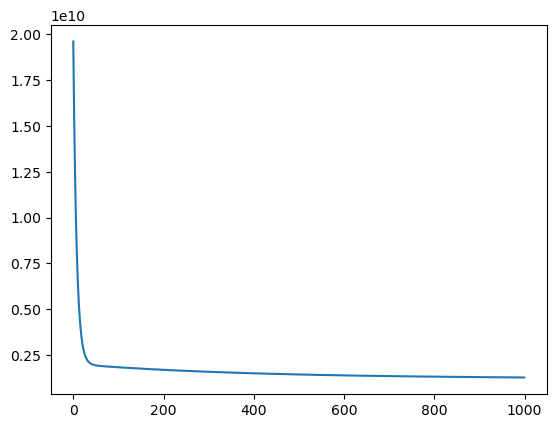

Test error is : 3370479.3481192784 %
Test Accuracy is : -3370379.3481192784 %


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_data = train.values     #converts df to nparray
Y = train_data[:, -1].reshape(train_data.shape[0], 1)   #reshape is used to make Y a column vector
X = train_data[:, :-1]
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]
X = np.vstack((np.ones((X.shape[0], )), X.T)).T      #to make sure w1*x1,w2*x2 and so on by adding a column of 1's
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

def regression(X,Y,alpha,iterations):
    m = Y.size
    W = np.zeros((X.shape[1],1))
    B = 0
    cost_list = []

    for i in range(iterations):
        y_prediction= np.dot(X,W) + B
        cost = (1/(2*m))*np.sum(np.square(y_prediction - Y))
        W_slope = (1/m)*np.dot(X.T, y_prediction - Y)
        B_slope = (1/m)*(y_prediction - Y)
        W = W - alpha*W_slope
        B = B - alpha*B_slope

        cost_list.append(cost)
        if (i %(iterations/ 10) == 0):
            print("Cost is :", cost)

    return W,cost_list

iteration = 10000
alpha = 0.000000005
W, cost_list = regression(X, Y, alpha =0.000000005,iterations=1000)


rng = np.arange(0, len(cost_list))
plt.plot(rng, cost_list)
plt.show()

y_pred = np.dot(X_test, W)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")